<h1 style="color:orange">1.Loading Libraries</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

<h2 style="color:orange">2.Loading Dataset</h2>

In [5]:
df=pd.read_csv('uber.csv')

<h2 style="color:orange">3.Data Preprocessing and Exploration</h2>

In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


<h4 style="color:yellow;">i->handling missing value</h4>

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


<h4 style="color:red";>removing all rows from the DataFrame df that contain any missing (null) values</h4>

In [9]:
df.dropna(axis = 0, inplace = True)

In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<h4 style="color:yellow;">ii->Checking for duplicate values</h4>

In [11]:
print(df.duplicated().any())
print(df.duplicated().sum())

False
0


<h4 style="color:yellow;">iv->Drop the irrelevant column 'Unnamed: 0', 'key'</h4>

In [12]:
df.shape

(199999, 9)

In [13]:
df.drop(['Unnamed: 0', 'key'], axis = 1, inplace = True)

In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


<h2 style="color:orange">4.FEATURE ENGINEERING</h2>

<h4 style="color:yellow;">i->Handling Outliers</h4>

<h4 style="color:red">display box plots for all numeric columns in the DataFrame df to visualize the distribution and detect outliers.</h4>

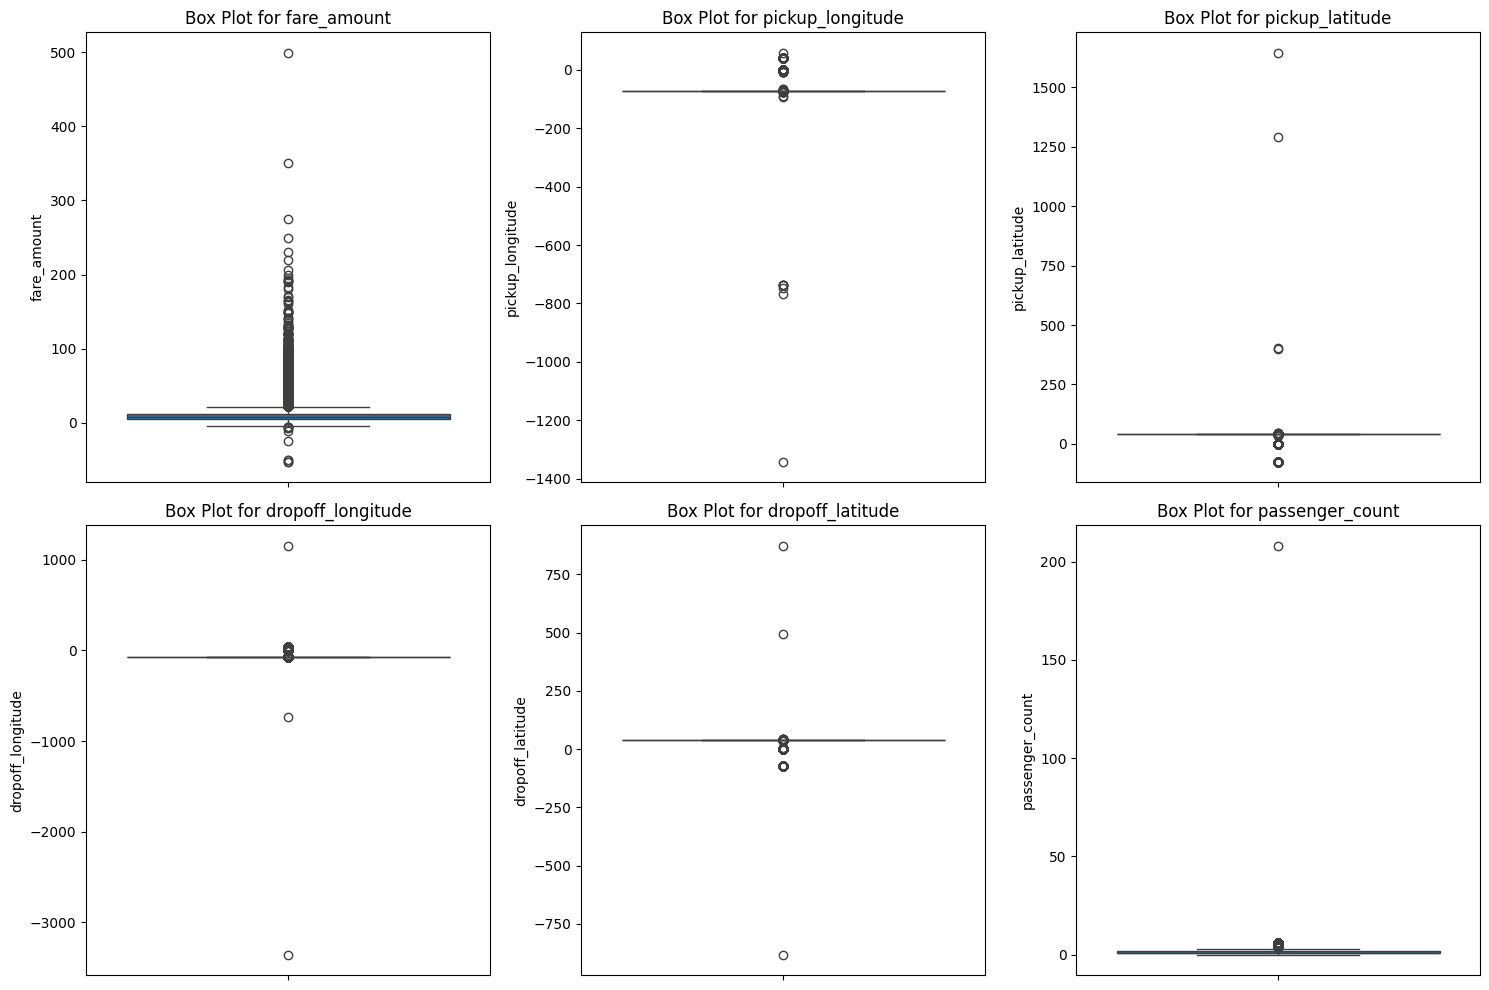

In [15]:
df_numeric = df.select_dtypes(include=[np.number])

cols_per_row = 3
num_cols = len(df_numeric.columns)
num_rows = int(np.ceil(num_cols / cols_per_row))

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(df_numeric.columns, 1):
    if pd.api.types.is_numeric_dtype(df[col]):  # Check for numeric data
        plt.subplot(num_rows, cols_per_row, i)
        sns.boxplot(df[col])
        plt.title(f"Box Plot for {col}")

plt.tight_layout()
plt.show()


<h4 style="color:red">Use IQR[Shift outliers value to Max and Min range] method to remove outliers </h4>

In [16]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate the IQR
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to exclude outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] #Trimming data

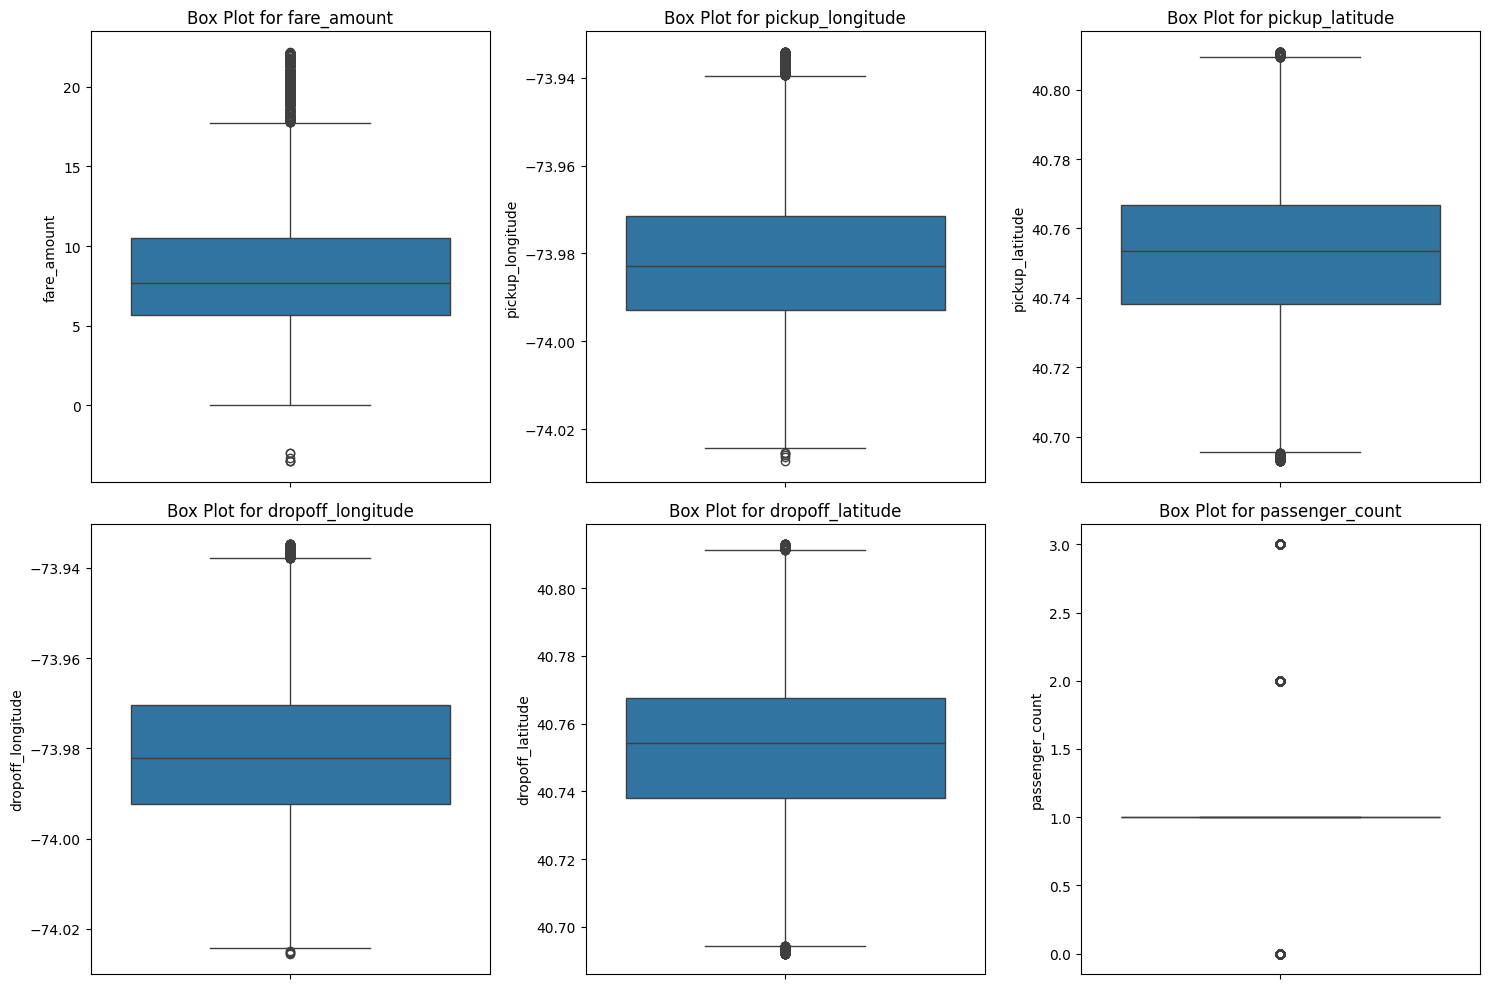

In [17]:
df_numeric = df.select_dtypes(include=[np.number])

cols_per_row = 3
num_cols = len(df_numeric.columns)
num_rows = int(np.ceil(num_cols / cols_per_row))

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(df_numeric.columns, 1):
    if pd.api.types.is_numeric_dtype(df[col]):  # Check for numeric data
        plt.subplot(num_rows, cols_per_row, i)
        sns.boxplot(df[col])
        plt.title(f"Box Plot for {col}")

plt.tight_layout()
plt.show()

<h4 style="color:yellow;">ii->Plot distribution of fare_amount</h4>

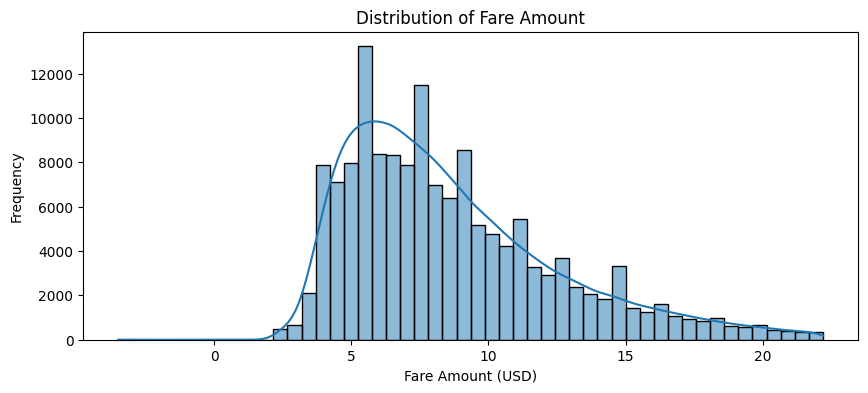

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency')
plt.show()

In [19]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1


<h4 style="color:yellow;">iii->Converting 'pickup_datetime' column to datetime format</h4>

In [20]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [21]:
df['pickup_datetime'].dtypes

datetime64[ns, UTC]

<h4 style="color:red">extracting and creating new columns for the year, month, weekday, and hour from the "pickup_datetime" column.</h4>

In [22]:
df["year"] = df["pickup_datetime"].dt.year
df["month"] = df["pickup_datetime"].dt.month
df["weekday"] = df["pickup_datetime"].dt.weekday
df["hour"] = df["pickup_datetime"].dt.hour

In [23]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2


<h4 style="color:yellow;">iv->Encoding</h4>

<h4 style="color:red">Map the month column in quater</h4>
<p>
Lambda Function: The lambda function checks the value of each month and assigns it to a quarter:<br>
"Q1" for January, February, and March (months 1, 2, 3).<br>
"Q2" for April, May, and June (months 4, 5, 6).<br>
"Q3" for July, August, and September (months 7, 8, 9).<br>
"Q4" for October, November, and December (months 10, 11, 12).
</p>

In [24]:
df['Monthly_quater']=df['month'].apply(lambda x:"Q1" if x in [1,2,3]
                                       else("Q2" if x in [4,5,6]
                                            else("Q3" if x in[7,8,9]
                                                 else("Q4"))))

<h4 style="color:red">Map the hour column</h4>

In [25]:
df["Hourly_Segments"] = df["hour"].apply(lambda x: "H1" if x in [0,1,2,3] 
                                             else("H2" if x in [4,5,6,7] 
                                                  else("H3" if x in [8,9,10,11]
                                                       else("H4" if x in [12,13,14,15]
                                                            else("H5" if x in [16,17,18,19]
                                                                 else("H6"))))))

In [26]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Monthly_quater,Hourly_Segments
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2,H5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3,H6
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3,H6
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2,H3
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2,Q1,H1


<h4 style="color:red">Column leveling</h4>
<p>
filters the DataFrame df to include only the rows where the latitude and longitude values are within their valid ranges:
<br>
Latitude should be between -90 and 90 degrees.<br>
Longitude should be between -180 and 180 degrees.<br>
</p>

In [27]:
df = df[(df["pickup_latitude"].between(-90,90)) &
        (df["dropoff_latitude"].between(-90,90)) &
        (df["pickup_longitude"].between(-180,180))&
        (df["dropoff_longitude"].between(-180,180))]


In [28]:
'''calculates the distance between pickup and dropoff coordinates for each ride in a dataset, 
then adds these distances as a new column to the DataFrame'''

distances=[] #empty List
for i in df.index:
    pickup_coords = (df["pickup_latitude"][i], df["pickup_longitude"][i]) # making tuple of coordinates of pickup point
    dropoff_coords = (df["dropoff_latitude"][i], df["dropoff_longitude"][i])
    distance=round(geodesic(pickup_coords,dropoff_coords).m,2)
    distances.append(distance)

df["distance"] = distances

<h4 style="color:yellow;">v->EDA</h4>

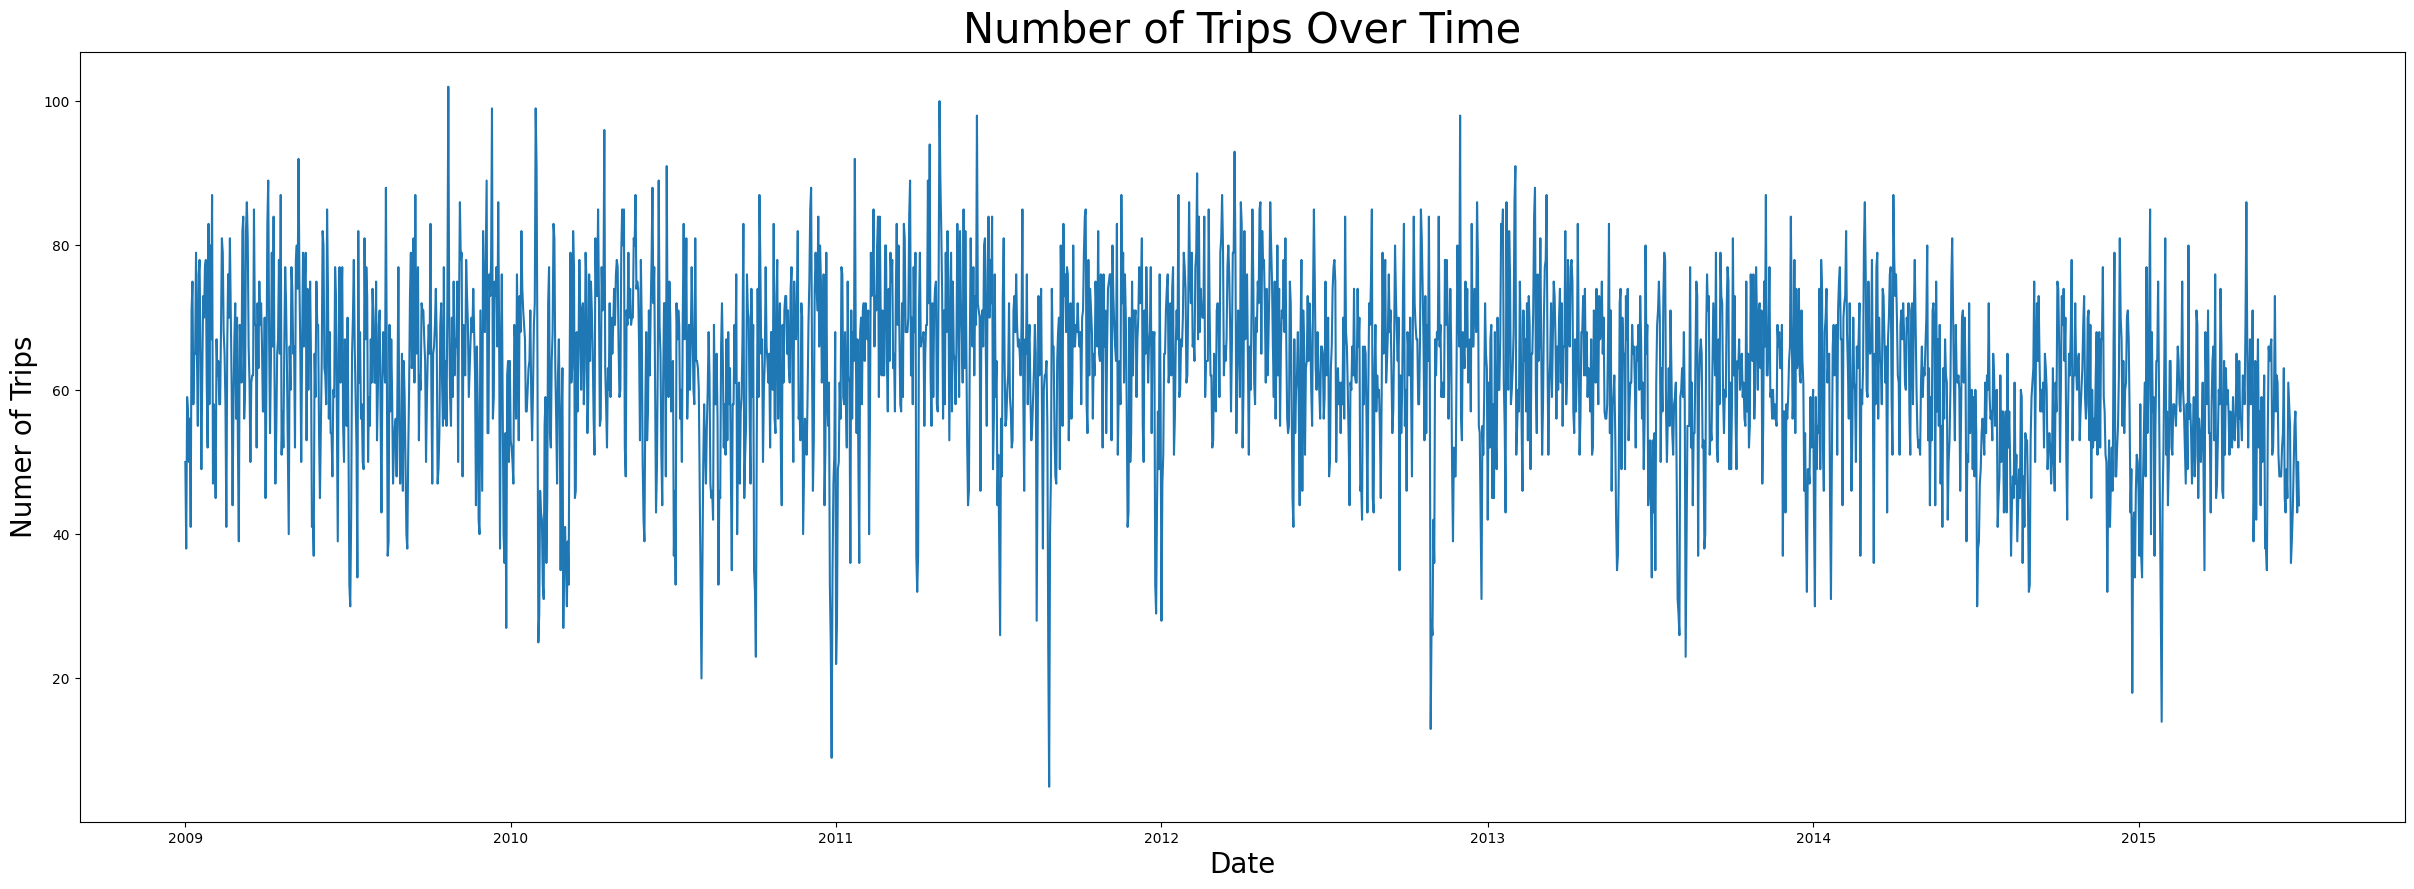

In [29]:
# Plot number of trips over time
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['pickup_date'] = df['pickup_datetime'].dt.date
trips_by_date = df.groupby('pickup_date').size()

plt.figure(figsize=(30,10))
trips_by_date.plot()
plt.title('Number of Trips Over Time', size = 30)
plt.xlabel('Date', size = 20)
plt.ylabel('Numer of Trips', size = 20)
plt.show()

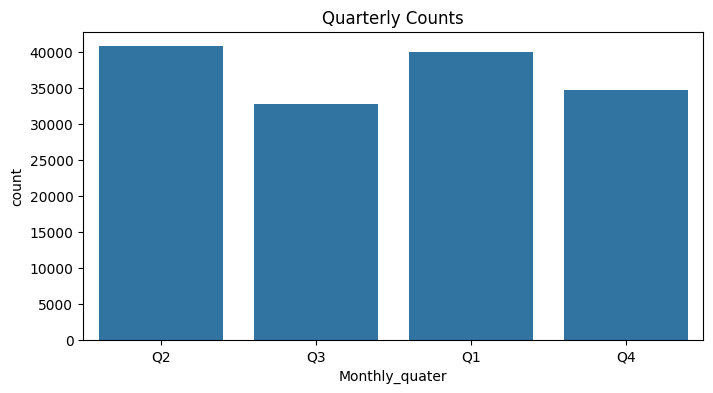

In [30]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["Monthly_quater"])
plt.title('Quarterly Counts')
plt.show()

<p>
*Q2 has the highest count, with a value around 40,000.<br>
*Q3 has the lowest count, with a value around 33,000.<br>
*Q1 and Q4 have intermediate counts, with values around 39,000 and 35,000 respectively.
</p>

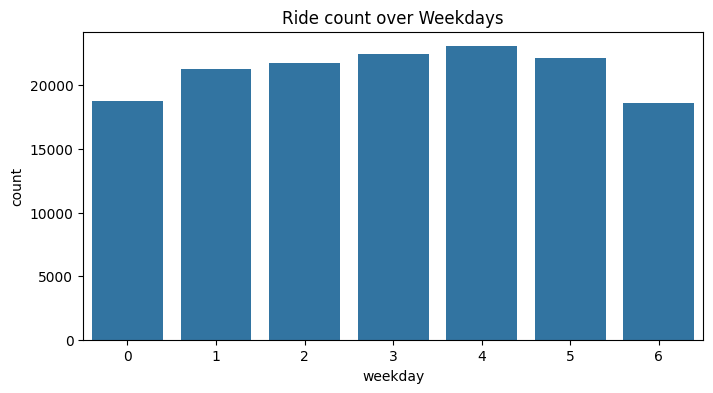

In [31]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["weekday"])
plt.title('Ride count over Weekdays')
plt.show()

<h4>On Weekends the ride count is comparatively less as compared to the weekdays.</h4>

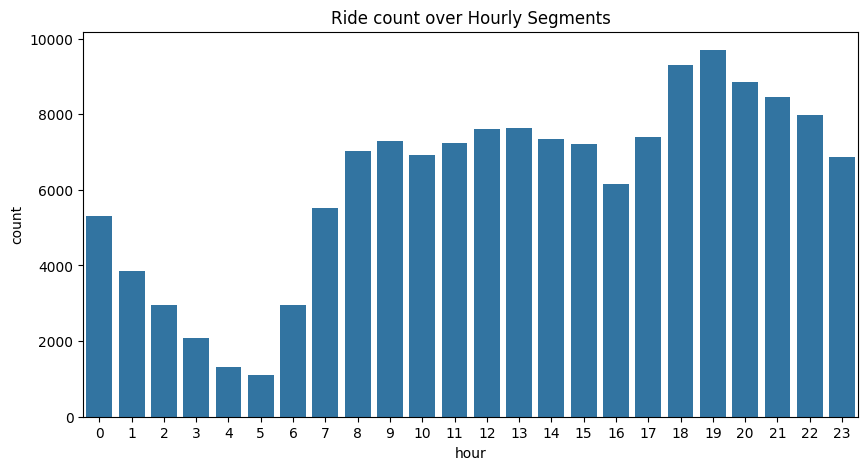

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["hour"])
plt.title('Ride count over Hourly Segments')
plt.show()

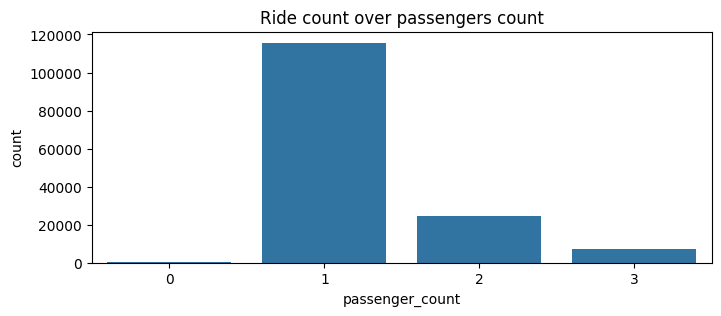

In [33]:
plt.figure(figsize=(8, 3))
sns.countplot(x=df["passenger_count"])
plt.title('Ride count over passengers count')
plt.show()

<p>
The majority of rides have only one passenger.<br>
The number of rides decreases significantly as the number of passengers increases.<br>
There are very few rides with more than two passengers.
</p>


In [34]:
df.shape

(148075, 15)

In [35]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Monthly_quater,Hourly_Segments,distance,pickup_date
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2,H5,1681.11,2015-05-07
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3,H6,2454.36,2009-07-17
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3,H6,5039.60,2009-08-24
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2,H3,1661.44,2009-06-26
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2,Q1,H1,0.00,2011-02-12


In [36]:
uber_df = df[["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","distance", "passenger_count", 'Monthly_quater', 'hour', 'weekday', 'year']]

In [37]:
uber_df.shape

(148075, 11)

In [38]:
uber_df = pd.get_dummies(df,columns = ['Monthly_quater', 'hour', 'weekday', 'year', 'passenger_count'],dtype = int, drop_first=True)

<h3> Applied One-hot Encoding to convert Categorical Column to Integer Column</h3>
<p>That line converts categorical columns into multiple binary columns (0/1) to make your dataset machine-learning ready.</p>

In [39]:
uber_df.shape

(148075, 51)

In [40]:
uber_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,Hourly_Segments,distance,pickup_date,...,weekday_6,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_1,passenger_count_2,passenger_count_3
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,5,H5,1681.11,2015-05-07,...,0,0,0,0,0,0,1,1,0,0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,7,H6,2454.36,2009-07-17,...,0,0,0,0,0,0,0,1,0,0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,8,H6,5039.60,2009-08-24,...,0,0,0,0,0,0,0,1,0,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,6,H3,1661.44,2009-06-26,...,0,0,0,0,0,0,0,0,0,1
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,2,H1,0.00,2011-02-12,...,0,0,1,0,0,0,0,1,0,0


In [41]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148075 entries, 0 to 199999
Data columns (total 51 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        148075 non-null  float64            
 1   pickup_datetime    148075 non-null  datetime64[ns, UTC]
 2   pickup_longitude   148075 non-null  float64            
 3   pickup_latitude    148075 non-null  float64            
 4   dropoff_longitude  148075 non-null  float64            
 5   dropoff_latitude   148075 non-null  float64            
 6   month              148075 non-null  int32              
 7   Hourly_Segments    148075 non-null  object             
 8   distance           148075 non-null  float64            
 9   pickup_date        148075 non-null  object             
 10  Monthly_quater_Q2  148075 non-null  int64              
 11  Monthly_quater_Q3  148075 non-null  int64              
 12  Monthly_quater_Q4  148075 non-null 

<h4 style="color:red;">Dropping column 'pickup_datetime' as we have already extracted information from it</h4>

In [42]:
uber_df.drop(['pickup_datetime', 'Hourly_Segments'], axis = 1, inplace = True)

In [43]:
uber_df.drop(['pickup_date'], axis = 1, inplace = True)

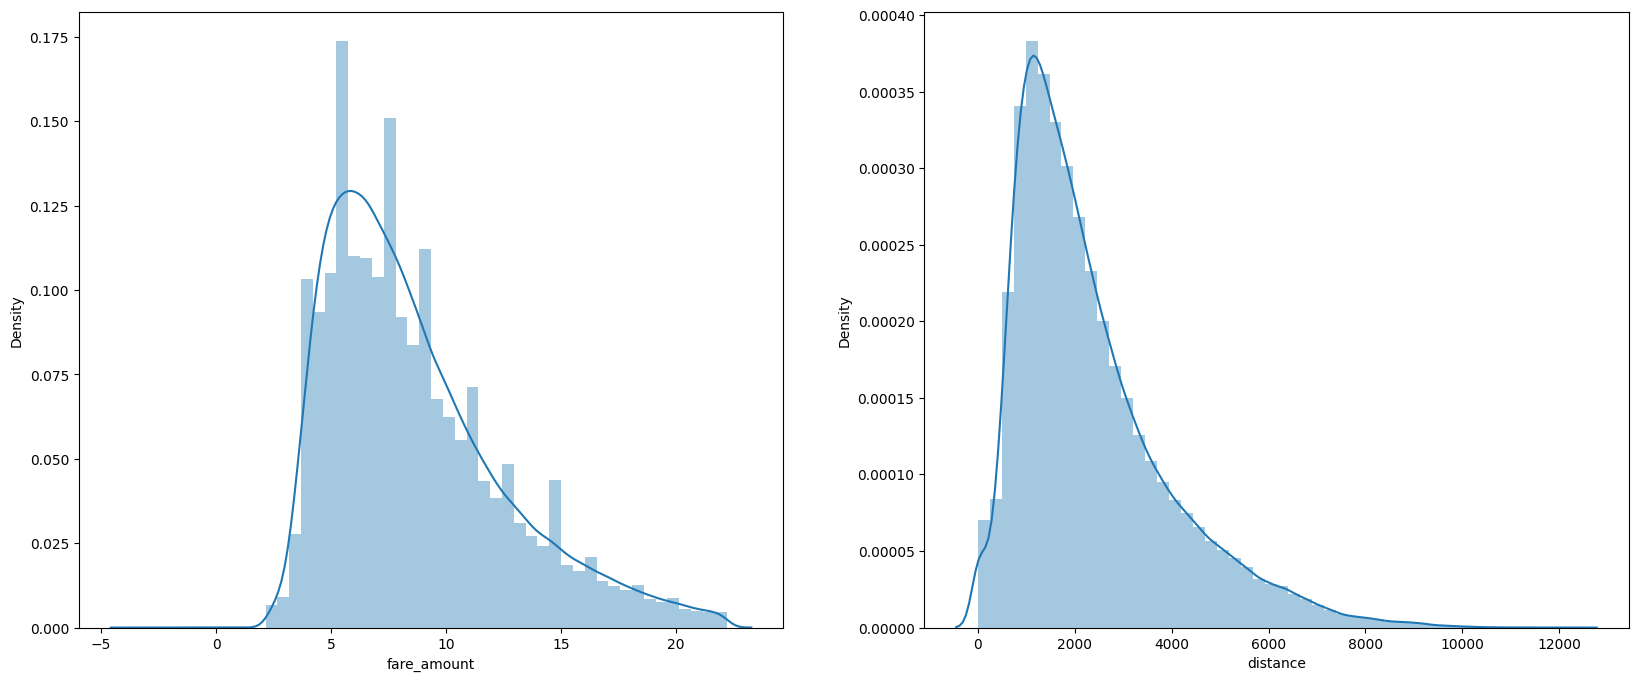

In [44]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(uber_df["fare_amount"])

plt.subplot(1,2,2)
sns.distplot(uber_df["distance"])
plt.show()

<h4>Fare amount and Distance showing normal distribution</h4>

<h2 style="color:orange">5.Train Test Split Data</h2>

In [45]:
X = uber_df.drop(["fare_amount"], axis = 1)
y = uber_df["fare_amount"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(148075, 47) (148075,) (118460, 47) (29615, 47) (118460,) (29615,)


<h2 style="color:orange">6.Standard Scaler</h2>

In [46]:
std=StandardScaler()

In [47]:
X_train_std = std.fit_transform(X_train)

In [48]:
X_test_std = std.transform(X_test)

<h2 style="color:orange">7.Model Selection</h2>

<h4 style="color:yellow;">i->Linear Regression</h4>

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr=LinearRegression()

In [51]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [52]:
print("Train Accuracy", lr.score(X_train_std,y_train))
print("Test Accuracy", lr.score(X_test_std,y_test))

Train Accuracy 0.7067929709658534
Test Accuracy 0.7097200663331968


In [53]:
y_pred=lr.predict(X_test_std)

In [54]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("Root Mean Squared Error:", rmse)



R² Score: 0.7097200663331968
Mean Absolute Error: 1.47029439109359
Mean Squared Error: 4.344859186224294
Root Mean Squared Error: 2.084432581357405


<p style="color:yellow;">Since the Linear Regression model did not perform well on this dataset, it is important to explore other regression models to improve the accuracy of fare predictions. By trying different regressor models, we can identify an approach that better captures the complexities of the data and enhances the overall performance of the prediction model</p>

<h4 style="color:yellow;">ii->XGBoost[Boosting]</h4>

<h2>Apply Random Search CV [for Faster executions] to find the best hyperparameter to train the model</h2>

In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


xgb = XGBRegressor(tree_method='hist', random_state=42, n_jobs=-1)


param_grid_xgb ={   
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],                   
    'learning_rate': [0.01, 0.1, 0.3],     
    'colsample_bytree': [0.7, 0.9]
}


rand_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

<h5 style="color:yellow">Evaluation</h5>

In [60]:
rand_search_xgb.fit(X_train, y_train)

print("Best Parameters found:", rand_search_xgb.best_params_)

best_xgb_model = rand_search_xgb.best_estimator_


training_r2 = best_xgb_model.score(X_train, y_train)
testing_r2 = best_xgb_model.score(X_test, y_test)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters found: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.9}


In [61]:
print(f"Optimized XGBoost Training [R2 Score]: {training_r2:.4f}")
print(f"Optimized XGBoost Testing [R2 Score]: {testing_r2:.4f}")

Optimized XGBoost Training [R2 Score]: 0.8162
Optimized XGBoost Testing [R2 Score]: 0.7888


<h4 style="color:yellow;">iii->RandomForestClassifier[Bagging]</h4>

<h2>Apply Random Search CV to find the best hyperparameter to train the model</h2>

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV 


param_grid_rf = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [8, 10, 13],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required at a leaf node
}

In [63]:
rf = RandomForestRegressor(random_state=42)

rand_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf, 
    n_iter=30,                          
    scoring='neg_mean_squared_error',
    cv=3,                              
    verbose=2,
    random_state=42,                   
    n_jobs=-1
)


rand_search_rf.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [8, 10, 13],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
print("Best Parameters found:", rand_search_rf.best_params_)

print("Total number of fits performed:", len(rand_search_rf.cv_results_['params']) * rand_search_rf.cv)

best_rf_model = rand_search_rf.best_estimator_


Best Parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 13}
Total number of fits performed: 90


In [65]:
training_r2 = best_rf_model.score(X_train, y_train)
testing_r2 = best_rf_model.score(X_test, y_test)

print(f"\nOptimized Random Forest Training [R2 Score]: {training_r2:.4f}")
print(f"Optimized Random Forest Testing [R2 Score]: {testing_r2:.4f}")


Optimized Random Forest Training [R2 Score]: 0.7979
Optimized Random Forest Testing [R2 Score]: 0.7426


<h2 style="color:orange">8. Exporting File</h2>

In [68]:
import pickle
pickle.dump(best_xgb_model, open("model.pkl", "wb"))